In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
df = pd.read_csv('homeprices_multiple.csv')
df.drop(index = 5, inplace = True)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [5]:
import math
median_bedrooms = df.bedrooms.median()
median_bedrooms = math.floor(median_bedrooms)

In [6]:
# df.bedrooms.fillna(medium_bedrooms)
df.bedrooms = df['bedrooms'].fillna(median_bedrooms)
# process data
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms', 'age']], df.price) # using often to train your model 

LinearRegression()

In [8]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [9]:
reg.intercept_ #Chặn

383724.9999999998

In [10]:
reg.predict([[3000,3,40]]) # predict with area: 3000, bedrooms: 3, age: 40

D:\ana\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [11]:
reg.predict([[2500,4,5]]) # predict with area: 2500, bedrooms: 4, age: 5

D:\ana\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([588625.])

In [12]:
pip install word2number


Note: you may need to restart the kernel to use updated packages.


In [13]:
# Exercise
df_ex = pd.read_csv('hiring.csv')
df_ex

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [14]:
print(df.columns)

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')


In [15]:
median_test_score = df_ex['test_score(out of 10)'].median()
median_test_score = math.floor(median_test_score)
median_test_score

8

In [16]:
df_ex['test_score(out of 10)'] = df_ex['test_score(out of 10)'].fillna(median_test_score)
df_ex

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [17]:
from word2number import w2n
df_ex.experience = df_ex.experience.fillna('zero')
df_ex['experience'] = df_ex['experience'].apply(w2n.word_to_num)

In [18]:
df_ex

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [19]:
reg_ex = linear_model.LinearRegression()
reg_ex.fit(df_ex[["experience","test_score(out of 10)","interview_score(out of 10)"]],df_ex["salary($)"])

LinearRegression()

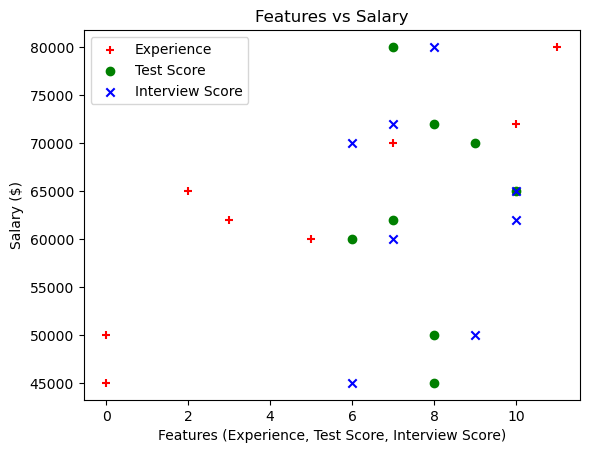

In [20]:

plt.scatter(df_ex['experience'], df_ex['salary($)'], color='red', marker='+', label='Experience')
plt.scatter(df_ex['test_score(out of 10)'], df_ex['salary($)'], color='green', marker='o', label='Test Score')
plt.scatter(df_ex['interview_score(out of 10)'], df_ex['salary($)'], color='blue', marker='x', label='Interview Score')

plt.xlabel('Features (Experience, Test Score, Interview Score)')
plt.ylabel('Salary ($)')
plt.title('Features vs Salary')
plt.legend()
plt.show()


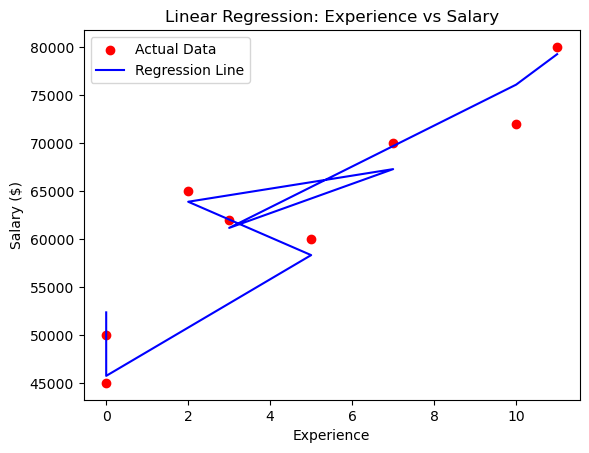

In [37]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df_ex[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]

y = df_ex['salary($)']

reg = LinearRegression()
reg.fit(X, y)

plt.scatter(df_ex['experience'], y, color='red', marker='o', label='Actual Data')


predicted_salary = reg.predict(df_ex[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']])

plt.plot(df_ex['experience'], predicted_salary, color='blue', label='Regression Line')


plt.xlabel('Experience')
plt.ylabel('Salary ($)')
plt.title('Linear Regression: Experience vs Salary')
plt.legend()
plt.show()


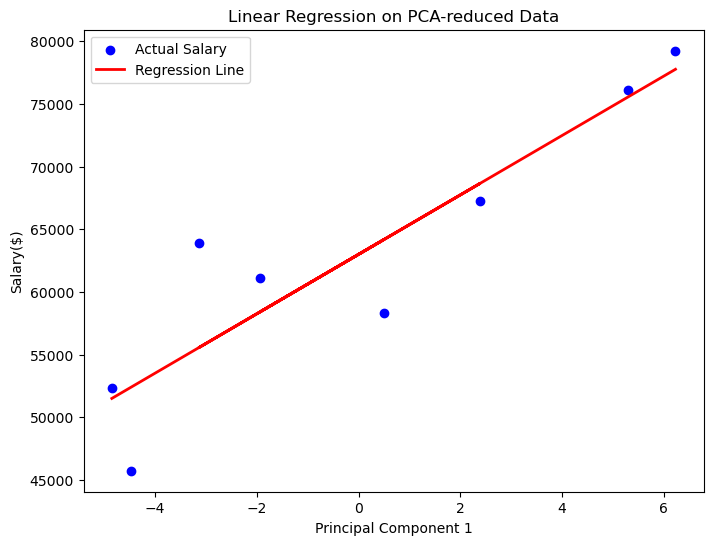

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Áp dụng PCA để giảm chiều dữ liệu đầu vào xuống 2D
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Vẽ lại dữ liệu và đường hồi quy tuyến tính
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], predicted_salary, color='blue', label='Actual Salary')
plt.plot(X_pca[:, 0], predicted_salary_pca, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Principal Component 1')
plt.ylabel('Salary($)')
plt.title('Linear Regression on PCA-reduced Data')
plt.legend()
plt.show()


In [101]:
reg_ex.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [102]:
reg_ex.intercept_

17737.26346433768

In [109]:
reg_ex.predict([[2,9,6]])
# predict 2yr, test_score: 9, interview_score: 6

D:\ana\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])